In [1]:
import numpy as np
from astropy.io import ascii
from astropy.stats import LombScargle
from PyAstronomy.pyasl import foldAt
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
raw_data = pd.read_csv('Star6.dat', sep='\s+', header=None, skiprows=0)
data = raw_data.rename(columns = {0:'mjd',1: 'flux',2:'flux_err'})
data.head()

,mjd,flux,flux_err
0,120.539677,1.003916,0.000120
1,120.560112,1.004175,0.000120
2,120.580547,1.004839,0.000120
3,120.600981,1.005284,0.000121
4,120.621416,1.005380,0.000120


counting total number of NAN value in each columns

In [3]:
# removing Rows that contains NAN Values
#data = data.dropna()

# counting total # of NAN value in each columns after droping NAN Values
#mjd_nan = data['mjd'].isnull().sum()
flux_nan = data['flux'].isnull().sum()
flux_err_nan = data['flux_err'].isnull().sum()

#mjd_nan, flux_nan, flux_err_nan 

#data.dropna(axis=0,how='any',thresh=None,subset=None, inplace=True)

In [4]:
data.dropna(subset=['mjd','flux','flux_err'], inplace=True)

In [5]:
data

,mjd,flux,flux_err
0,120.539677,1.003916,0.000120
1,120.560112,1.004175,0.000120
2,120.580547,1.004839,0.000120
3,120.600981,1.005284,0.000121
4,120.621416,1.005380,0.000120
...,...,...,...
65257,1590.920178,1.002014,0.000124
65258,1590.940613,1.002637,0.000124
65259,1590.961048,1.003361,0.000124
65260,1590.981482,1.004048,0.000123


In [6]:
mjd_nan = data['mjd'].isnull().sum()
flux_nan = data['flux'].isnull().sum()
flux_err_nan = data['flux_err'].isnull().sum()

mjd_nan, flux_nan, flux_err_nan 

(0, 0, 0)

#print(len(mjd))

In [7]:
data.sort_values(by=['mjd'], ascending=True, na_position='last')

,mjd,flux,flux_err
0,120.539677,1.003916,0.000120
1,120.560112,1.004175,0.000120
2,120.580547,1.004839,0.000120
3,120.600981,1.005284,0.000121
4,120.621416,1.005380,0.000120
...,...,...,...
65257,1590.920178,1.002014,0.000124
65258,1590.940613,1.002637,0.000124
65259,1590.961048,1.003361,0.000124
65260,1590.981482,1.004048,0.000123


In [8]:
# convert Pandas seies into normal list
mjd=(data['mjd'].values.tolist())
flux=(data['flux'].values.tolist())
flux_err=(data['flux_err'].values.tolist())
mjd, flux, flux_err= mjd, flux, flux_err

In [9]:
def LS_range(t):
    fmin = 1.0/(max(t))
    dt = [ t[i+1] - t[i-1] for i in range(1,len(t)-1)]
    fmax = 0.5/np.mean([dt[i] for i in range(len(dt)) if dt[i] < 1.0])
    return fmin,fmax

In [10]:
fmin,fmax = LS_range(mjd)
print(fmin, fmax)
fmax=(fmax)

0.0006285347549332965 11.884862719405348


In [11]:
ls = LombScargle(mjd,flux,flux_err)

In [12]:
freq,power = ls.autopower(minimum_frequency=fmin,maximum_frequency=fmax)
print(freq,power)

[6.28534755e-04 7.64546408e-04 9.00558061e-04 ... 1.18846467e+01
 1.18847827e+01 1.18849187e+01] [1.50606663e-05 1.13762753e-05 1.00227652e-05 ... 7.03264656e-08
 1.34296168e-08 4.54628275e-09]


In [13]:
best_f=freq[np.argmax(power)];
period=1.0/best_f
#period from the ls periodogram
print("Period is %s days."%(period))

Period is 3.1902471668041774 days.


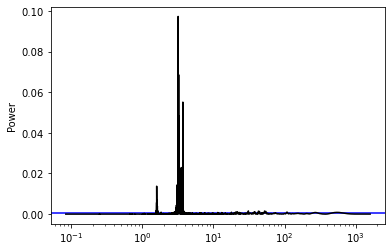

In [14]:
plt.ylabel('Power')
plt.xscale('log') #if you want x-axis to be logarithmic
#plt.xlim(0.5, 0.6)
plt.axhline(ls.false_alarm_level(0.001),color='b')
plt.plot(1.0/freq, power, color ='k')
plt.show()

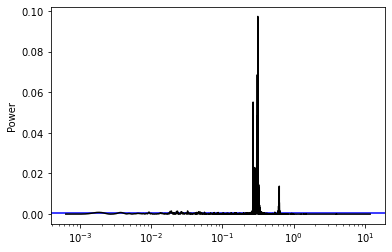

In [15]:
plt.ylabel('Power')
plt.xscale('log') #if you want x-axis to be logarithmic
#plt.xlim(0.4, 0.7)
plt.axhline(ls.false_alarm_level(0.001),color='b')
plt.plot(freq, power, color ='k')
plt.show()

In [16]:
def phase_data(mjd,flux,flux_err,period,T0):
    phase = foldAt(mjd, period, T0=T0)
    flux_phase = [flux for phase,flux in sorted(zip(phase, flux))]
    err_phase = [flux_err for phase,flux_err in sorted(zip(phase, flux_err))]
    phase = np.sort(phase)
    return phase, flux_phase, err_phase

In [17]:
T0= 0.2

In [18]:
phase,flux_phase,err_phase= phase_data(mjd,flux,flux_err,period,period)

In [19]:
#phase,flux_phase,err_phase= phase_data(np.array(mjd[0:20000],float),np.array(flux[0:20000],float),np.array(flux_err[0:20000],float),period,T0)

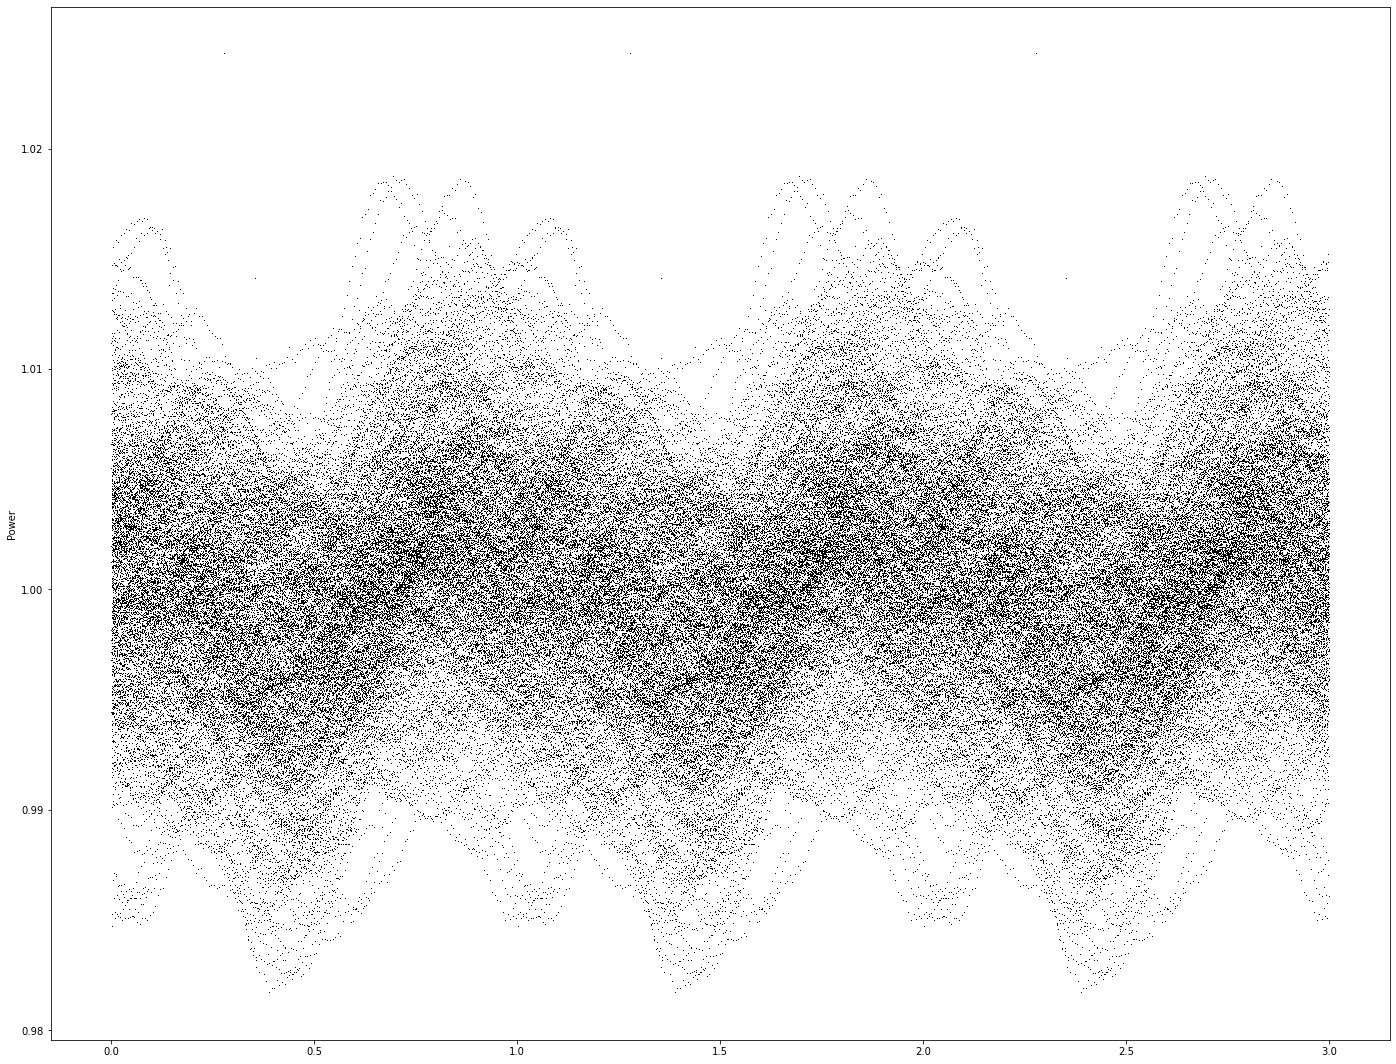

In [20]:
plt.figure(figsize=[24,19])
plt.ylabel('Power')

#plt.xscale('log')
#if you want x-axis to be logarithmic
#plt.axhline(ls.false_alarm_level(0.001),color='b')
plt.plot(phase, flux_phase, ',k')
plt.plot(phase+1, flux_phase,',k')
plt.plot(phase+2, flux_phase,',k')
#plt.plot(phase+3, flux_phase,',k')
#plt.plot(phase+4, flux_phase,',k')
#plt.plot(phase+6, flux_phase,',k')
#plt.plot(phase+8, flux_phase,',k')
plt.show()

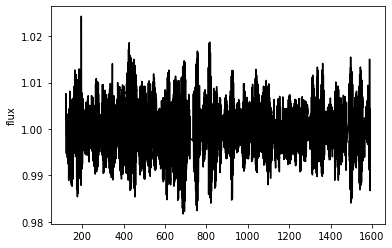

In [21]:
plt.ylabel('flux')
#plt.xscale('log') 
#if you want x-axis to be logarithmic
#plt.xlim(2.455278e+6, 2.455280e+6)
#plt.axhline(ls.false_alarm_level(0.001),color='b')
plt.plot(mjd,flux, color ='k')
plt.show()

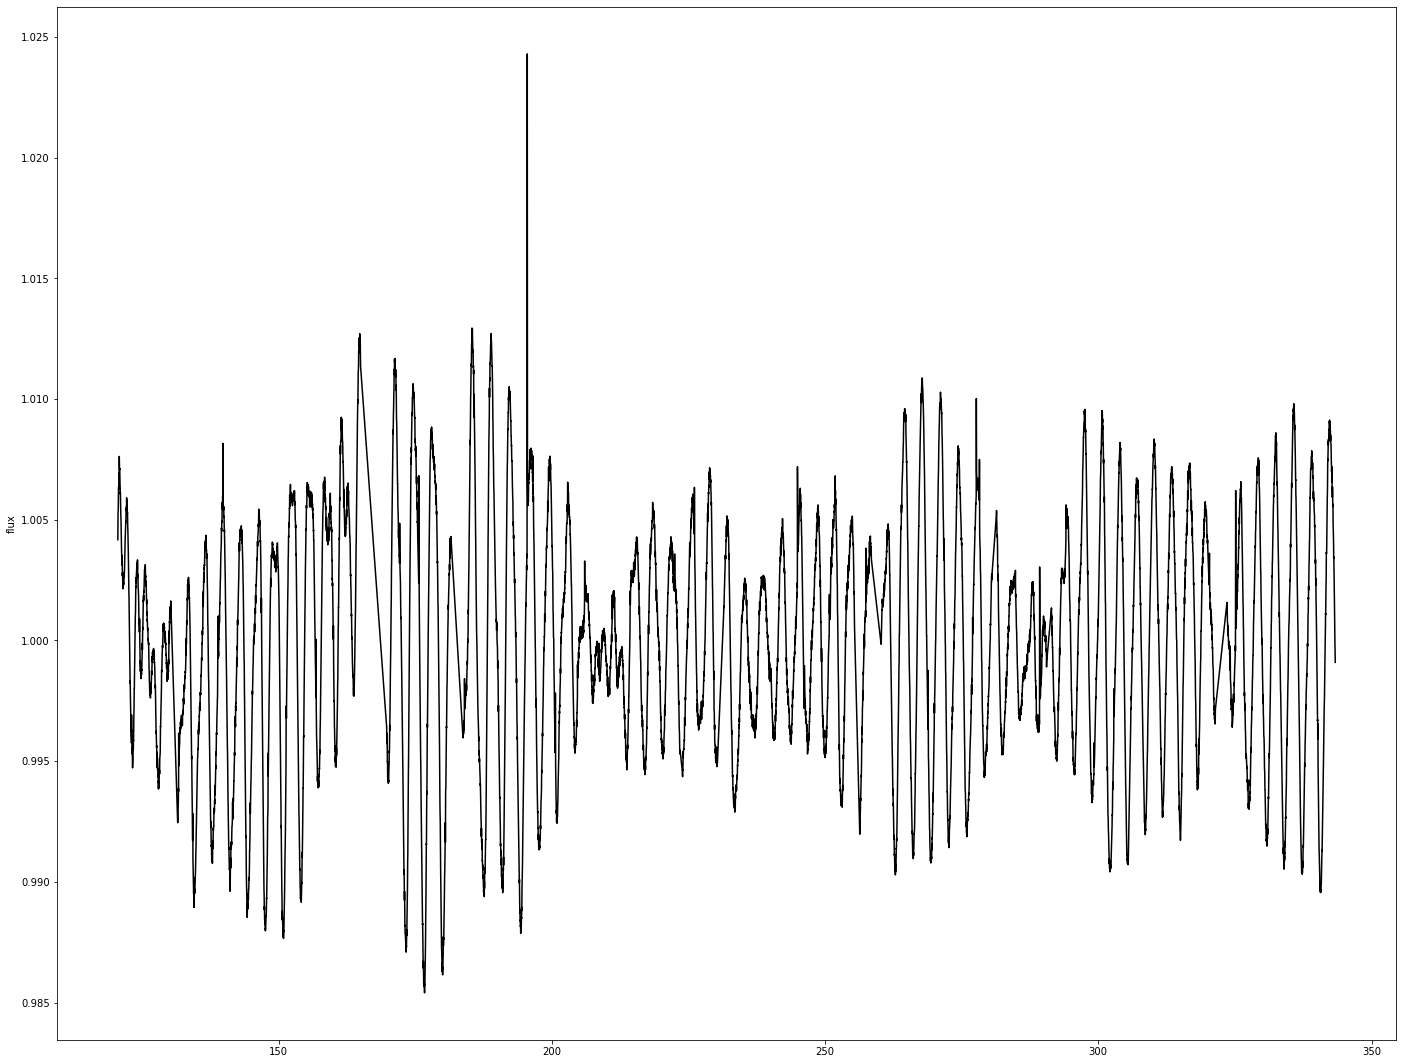

In [22]:
plt.figure(figsize=[24,19])
plt.ylabel('flux')
#plt.xscale('log') 
#if you want x-axis to be logarithmic
#plt.xlim(2.455278e+6, 2.455280e+6)
plt.plot(mjd[1:10000],flux[1:10000], color ='k')
plt.show()